In [308]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
#setting attributes for sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")



In [237]:
#reading the data
data= pd.read_csv('car_age_price.csv')

## **Exploratory** **Data** **Analytics**

In [238]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [239]:
#getting information about data
data.shape

(112, 2)

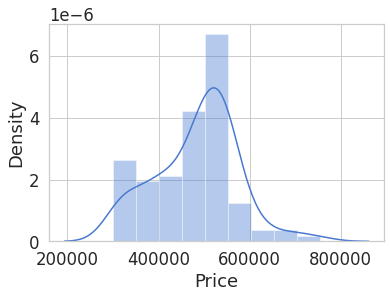

In [240]:
#ploting the price
sns.distplot(data['Price'])
plt.show()

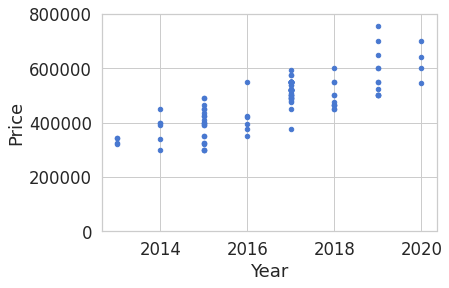

In [309]:
#scatter plot of data
var = 'Year'
data = pd.concat([data['Price'], data[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000));

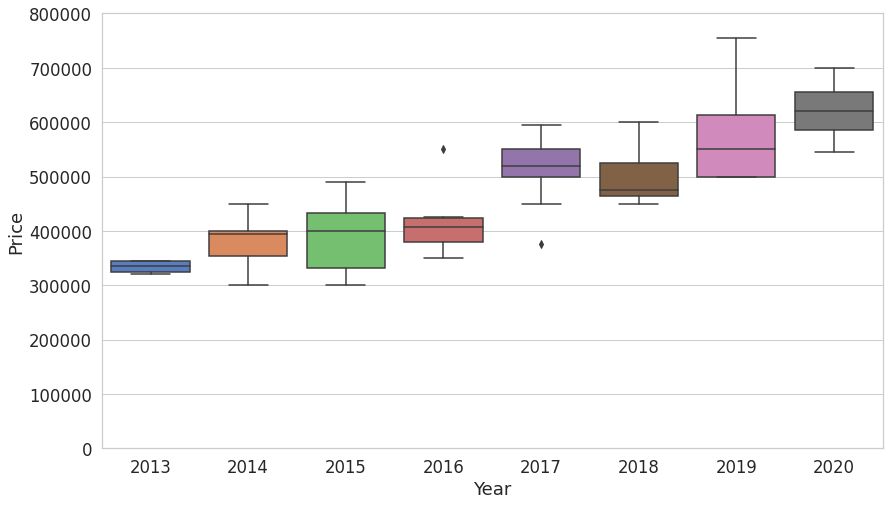

In [242]:
#boxplot of data
var = 'Year'
data = pd.concat([data['Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=800000);

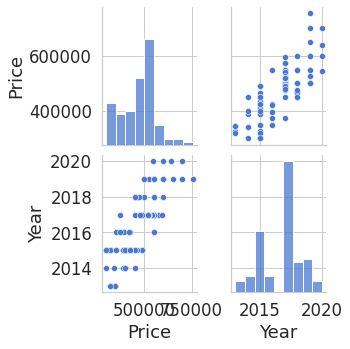

In [243]:
#pairplot of data
sns.pairplot(data)

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   112 non-null    int64
 1   Year    112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [245]:
data.describe()

,Price,Year
count,112.000000,112.000000
mean,483866.044643,2016.669643
std,91217.450533,1.629616
min,300000.000000,2013.000000
25%,423750.000000,2015.000000
50%,500000.000000,2017.000000
75%,550000.000000,2017.000000
max,755000.000000,2020.000000


In [246]:
#checking for missing values
data.isna().sum()

Price    0
Year     0
dtype: int64

In [247]:
#finding number of unique values in year and price
data['Year'].nunique()

8

In [248]:
data['Price'].nunique()

35

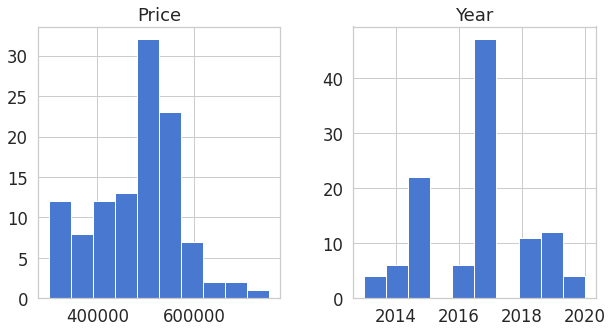

In [249]:
#printing histogram of data
freqgraph=data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(10,5))
plt.show()

<AxesSubplot:>

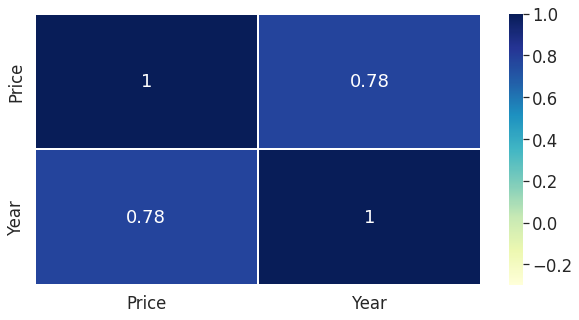

In [250]:
#ploting correlation matrix
corrmatrix =data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmin=-0.3,vmax=1,linewidth=0.3,cmap='YlGnBu')


**Splitting** **the** **Data** **into** **Training** **and** **Testing** **Sets**

In [251]:
#splitting the dataset
y=data['Price']
x=data.drop(['Price'],axis=1)

In [252]:
#printing x and y
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [253]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [322]:
#split data as training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=101)


In [323]:
# loading the linear regression model 
# creating instance lr
from sklearn import linear_model
lr=linear_model .LinearRegression()

In [324]:
#model fitting
model=lr.fit(x_train,y_train)

In [325]:
# prediction on Training data 
y_pred=model.predict(x_test)

In [320]:
#predicted values
y_pred

array([495886.01129065, 495886.01129065, 495886.01129065, 495886.01129065,
       580288.98589924, 495886.01129065, 580288.98589924, 580288.98589924,
       495886.01129065, 495886.01129065, 495886.01129065, 327080.06207347,
       580288.98589924, 411483.03668205, 495886.01129065, 495886.01129065,
       622490.47320354, 580288.98589924, 411483.03668205, 453684.52398635,
       580288.98589924, 411483.03668205, 411483.03668205])

In [310]:
#predicting for new data
Xnew = [[2022]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2022], Predicted=706893.4478121251


In [326]:
#intercept of model
model.intercept_

-84624513.88147336

In [327]:
#Regression coefficient of model
model.coef_

array([42201.4873043])

**Best** **fit** **line**

In [330]:
#Best fit line
# y = ß0 + ß1.x1
print("y=",model.intercept_,"+",model.coef_,"* x")

y= -84624513.88147336 + [42201.4873043] * x


In [260]:
#printing Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error,r2_score
print('mse=',mean_squared_error(y_test,y_pred))
print('r2_score=',r2_score(y_test,y_pred))

mse= 3230918281.6270127
r2_score= 0.6512816585604304


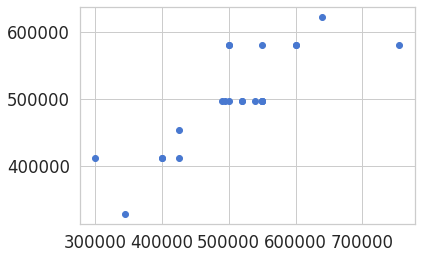

In [311]:
#scatter plot of predictions
plt.scatter(y_test,y_pred)

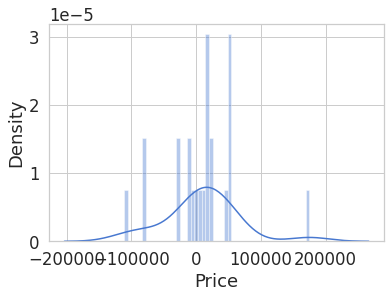

In [262]:
#histogram of predictions
sns.distplot((y_test-y_pred),bins=50); 

<AxesSubplot:xlabel='Price'>

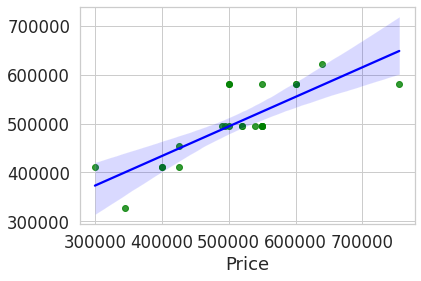

In [263]:
# create scatterplot with regression line 
sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

**Normalization**

In [264]:
#Normalisation
from sklearn import preprocessing
x1=preprocessing.normalize(x)

In [336]:
#convert x1 to dataframe 
x1=pd.DataFrame(x1,columns=['Year'])

In [337]:
x1

,Year
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
107,1.0
108,1.0
109,1.0
110,1.0


In [267]:
x1.describe()

,Year
count,112.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [303]:
#linear regression using normalized x1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2, random_state=101)#random_state=42,test_size=0.2)

In [304]:
#creating model
lr2=linear_model.LinearRegression()
model2=lr2.fit(x_train,y_train)
#prediction
y_pred2=model2.predict(x_test)

In [313]:
#prediction for new value
Xnew = [[2022]]
# make a prediction
ynew = model2.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2022], Predicted=477393.2247191011


In [306]:
#finding mse and r2 score
print('mse=',mean_squared_error(y_test,y_pred2))
print('r2_score=',r2_score(y_test,y_pred2))

mse= 10258621847.956215
r2_score= -0.10722998369167835


<AxesSubplot:xlabel='Price'>

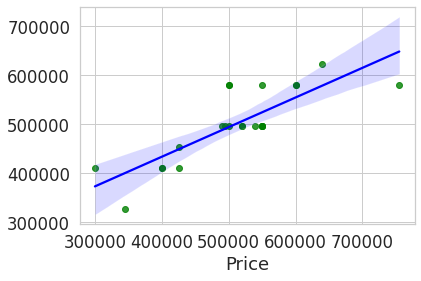

In [272]:
# create scatterplot with regression line 
sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

**Scaling**

In [273]:
#Minmaxscaling
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
x2=minmax.fit_transform(x)

In [274]:
#converting x2 to dataframe
x2=pd.DataFrame(x2,columns=[' Year'])

In [275]:
x2.describe()

,Year
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [333]:
#linear regression using scaled x2
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2, random_state=101)


In [334]:
#model creation
lr3=linear_model.LinearRegression()
#model fitting
model3=lr3.fit(x_train,y_train)
#Predicting for x_train
y_pre=model3.predict(x_train)
#Predicting for x_train
y_pred3=model3.predict(x_test)

In [335]:
Xnew = [[2022]]
# make a prediction
ynew = model3.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2022], Predicted=597646931.3670768


In [316]:
#evaluation metrices on training set
print('mse=',mean_squared_error(y_train,y_pre))
print('r2_score=',r2_score(y_train,y_pre))
#evaluation metrices on testing set
print('mse=',mean_squared_error(y_test,y_pred3))
print('r2_score=',r2_score(y_test,y_pred3))

mse= 3298395485.743802
r2_score= 0.5759886749119923
mse= 3230918281.627336
r2_score= 0.6512816585603955


<AxesSubplot:xlabel='Price'>

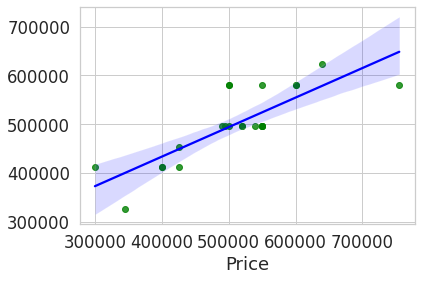

In [280]:
# create scatterplot with regression line 
sns.regplot(y_test, y_pred3, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

**Lasso** **regression**

In [281]:
from sklearn.linear_model import Lasso
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=101)
#Initializing the Lasso Regressor
lassoReg = Lasso(alpha=0.01)
#Fitting the Training data to the Lasso regressor
lassoReg.fit(x_train,y_train)
#Predicting for x_train
pre=lassoReg.predict(x_train)
#Predicting for x_test
pred = lassoReg.predict(x_test)


In [317]:
#prediction for new data
Xnew = [[2022]]
# make a prediction
ynew = lassoReg.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[2022], Predicted=706893.426196307


In [283]:

#evaluation metrices on training set
print('mse=',mean_squared_error(y_train,pre))
print('r2_score=',r2_score(y_train,pre))
#evaluation metrices on testing set
print('mse=',mean_squared_error(y_test,pred))
print('r2_score=',r2_score(y_test,pred))

mse= 3298395485.743552
r2_score= 0.5759886749120244
mse= 3230918417.1988373
r2_score= 0.6512816439279397


In [284]:
from sklearn.linear_model import Lasso
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=101)
#Initializing the Lasso Regressor with alpha as 1
lasso_reg = Lasso(alpha=1)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(x_test)

In [285]:
#evaluation metrices on testing set
print('mse=',mean_squared_error(y_test,y_pred_lass))
print('r2_score=',r2_score(y_test,y_pred_lass))


mse= 3230931839.3045616
r2_score= 0.6512801952579212


<AxesSubplot:xlabel='Price'>

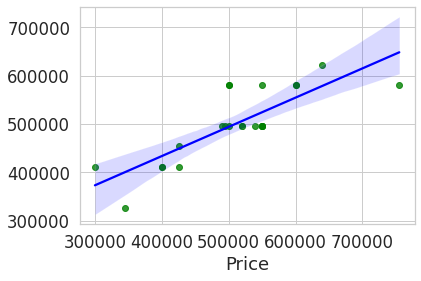

In [286]:
# create scatterplot with regression line 
sns.regplot(y_test, y_pred_lass, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 